## **WEEK 2 EXERCISES - Simple Comparative Experiments**
---

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.power as smp
import statsmodels.stats.proportion as smprop

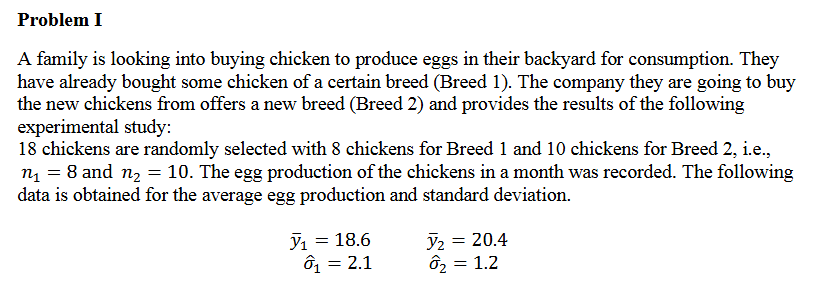

### Q1:
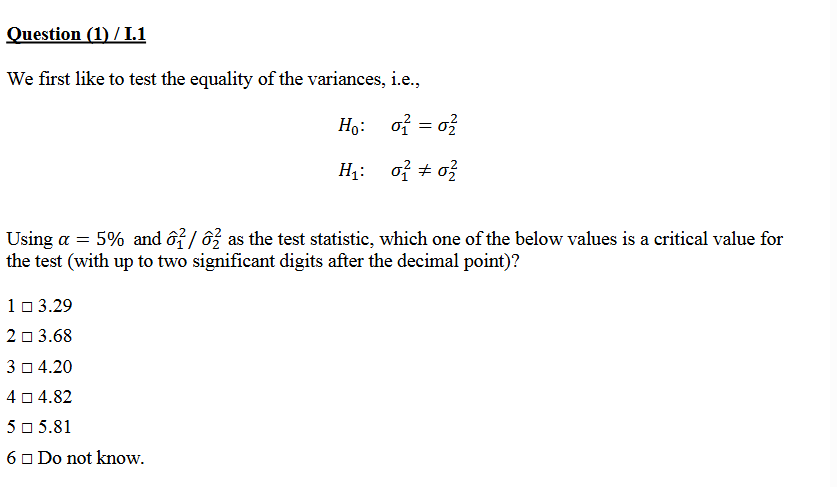


#### 1. Understand the Problem

- You have **two samples** (two groups).  
- You want to check if their **variances are equal**.  
- This is a **two-sample F-test for equality of variances**.



#### 2. State the Hypotheses

- Null hypothesis (H0): the variances are equal  
  H0: σ1² = σ2²  

- Alternative hypothesis (H1): the variances are not equal  
  H1: σ1² ≠ σ2²  

This is a **two-tailed test**, since we care about both whether one variance is much bigger *or* much smaller.



#### 3. Test Statistic

The test statistic is the **ratio of sample variances**:

$$
F = \frac{s_1^2}{s_2^2}
$$

- Always put the **larger variance in the numerator** if you want to simplify table lookup.  
- But if you compute directly in Python, you can keep the given order — just make sure to use the correct degrees of freedom.  



#### 4. Degrees of Freedom

Each variance estimate has its own degrees of freedom:

- Numerator: df1 = n1 − 1  
- Denominator: df2 = n2 − 1  

These determine which **F distribution** to use.



#### 5. Critical Values

Since it’s a two-tailed test at α = 0.05:

- Lower critical value:  
  $F_{0.025, df1, df2}$  

- Upper critical value:  
  $F_{0.975, df1, df2}$  

- Decision rule:  
  - If F < F_lower or F > F_upper → **Reject H0**  
  - Otherwise → **Fail to reject H0**



#### 6. Python Workflow:

In [ ]:

# 1. Sample sizes and standard deviations
n1, n2 = 8, 10
s1, s2 = 2.1, 1.2

# 2. Degrees of freedom
df1, df2 = n1 - 1, n2 - 1

# 3. Compute F statistic (variance ratio)
F = (s1**2) / (s2**2)
print("F =", F)

# 4. Get critical values for alpha = 0.05
alpha = 0.05
F_lower = stats.f.ppf(alpha/2, df1, df2)
F_upper = stats.f.ppf(1 - alpha/2, df1, df2)
print("Critical range:", F_lower, "< F <", F_upper)

# 5. Decision
if F < F_lower or F > F_upper:
    print("Reject H0: variances are different")
else:
    print("Fail to reject H0: no evidence variances differ")




F = 3.0625
Critical range: 0.2073304979757461 < F < 4.197046636945515
Fail to reject H0: no evidence variances differ


In [6]:
print(stats.f.ppf(0.975, dfn = 7, dfd = 9))

4.197046636945515


---
## Q2:

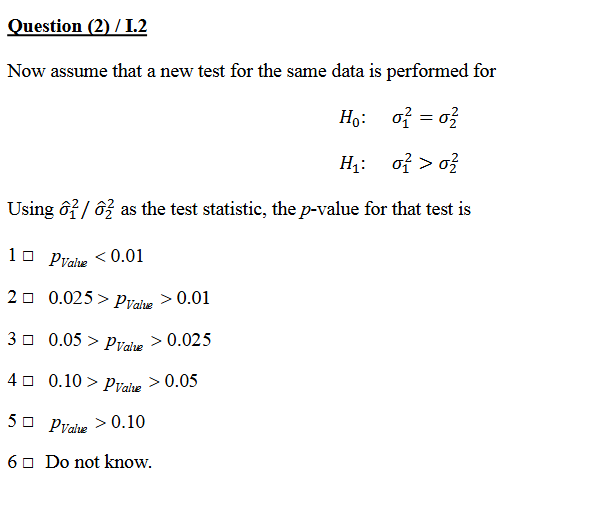


####  Step 1: New Hypotheses

- Null hypothesis (H0):  
  $\sigma_1^2 = \sigma_2^2$  

- Alternative hypothesis (H1):  
  $\sigma_1^2 > \sigma_2^2$ 

Because the alternative uses **greater than ( > )**, this is a **right-tailed F-test**.  
We only look at the **upper tail** of the distribution.


#### Step 2: Test Statistic

The test statistic is the same as in the two-sided test:

$$
F = \frac{s_1^2}{s_2^2}
$$

- Example: with the chicken data, F ≈ 3.06  
- Difference from two-sided: we now **only care about the right tail**.



#### Step 3: p-Value for One-Sided Test

For a right-tailed F-test, the p-value is:

$$
p = 1 - \text{CDF}(F, \, df_1, \, df_2)
$$

- CDF = cumulative distribution function of the F-distribution  
- This gives the probability of seeing an F **at least as large** as the observed value.  

If this p-value ≤ α (e.g., 0.05), we **reject H0** and conclude the first variance is larger.


In [7]:
pvalue = 1 - stats.f.cdf(F, df1, df2)

print(pvalue)      

0.06065732072446972


---
## Q3:
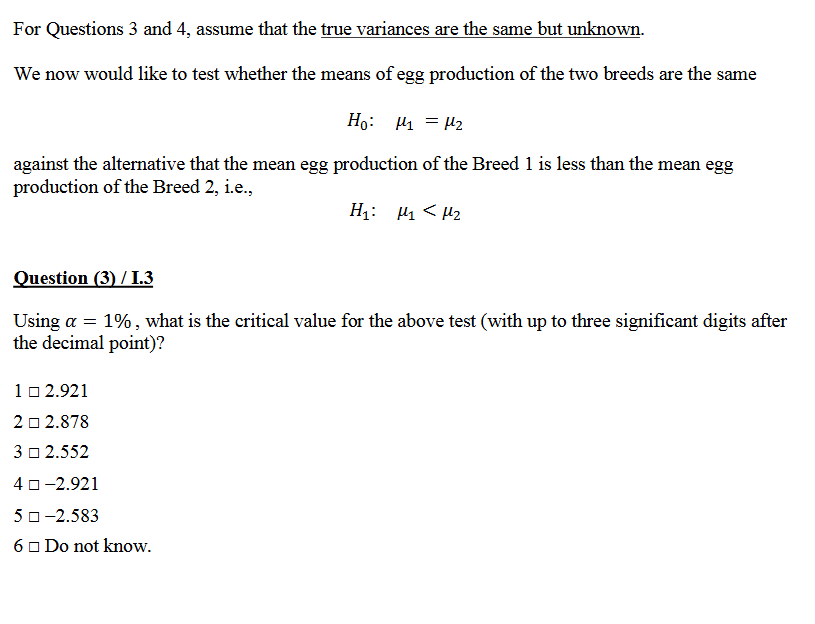

#### 1. First, read the hypotheses carefully

- H₀: μ₁ = μ₂  
- H₁: μ₁ < μ₂  

That “less than” sign tells you immediately:
- This is a **one-sided test** (not two-sided).  
- Specifically, it’s **left-tailed** because we’re looking for evidence that μ₁ is smaller.  


#### 2. Next, identify the type of test

The question says *“assume the true variances are the same but unknown.”*  
- That means we don’t know σ², but we assume the two groups share a common variance.  
- → Use the **pooled two-sample t-test**.  

So, the reference distribution is a **t-distribution**.  


#### 3. Work out the degrees of freedom

For the pooled two-sample t-test:  
$$
df = n₁ + n₂ - 2
$$

Here:  
- n₁ = 8  
- n₂ = 10  
- df = 8 + 10 − 2 = 16  

This tells us which **t-distribution** to use.  

#### 4. Understand what they mean by “critical value”

The critical value is the cutoff point on the t-distribution such that:
- The area in the **left tail** = α = 0.01  
- In other words, it’s the **t-quantile at the 1% level**.  

Because it’s left-tailed:
- We expect a **negative number**.  
- If the test statistic is smaller (more negative) than this cutoff → **Reject H₀**.  


#### 5. How to get the number

- If you had a **t-table**, look up df = 16, α = 0.01, one-tailed.  
- If you’re coding, use:

#### 6. Extra
- Ignore the positive options (because left-tailed means the critical value is negative).

In [8]:
n1,n2 = 8,10
df = n1 + n2 - 2
t= stats.t.ppf(0.01, 16)
print(t)

-2.5834871852674723


---
## Q4:
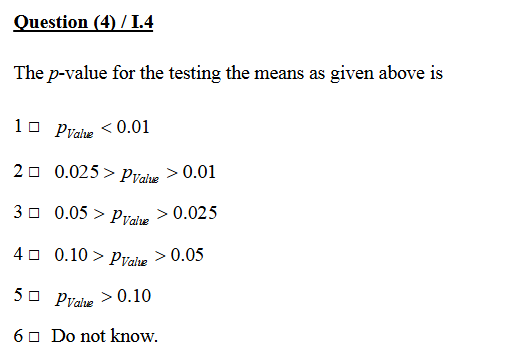


In [9]:
import scipy.stats as stats
import numpy as np

# Given data
mean1, mean2 = 18.6, 20.4
s1, s2 = 2.1, 1.2
n1, n2 = 8, 10

# Degrees of freedom
df = n1 + n2 - 2

# Pooled variance
sp2 = ((n1-1)*s1**2 + (n2-1)*s2**2) / df
sp = np.sqrt(sp2)

# Test statistic
t0 = (mean1 - mean2) / (sp * np.sqrt(1/n1 + 1/n2))
print("t0 =", t0)

# Left-tailed p-value
p_value = stats.t.cdf(t0, df)
print("p-value =", p_value)


t0 = -2.2927436645411583
p-value = 0.01787583822675048


---
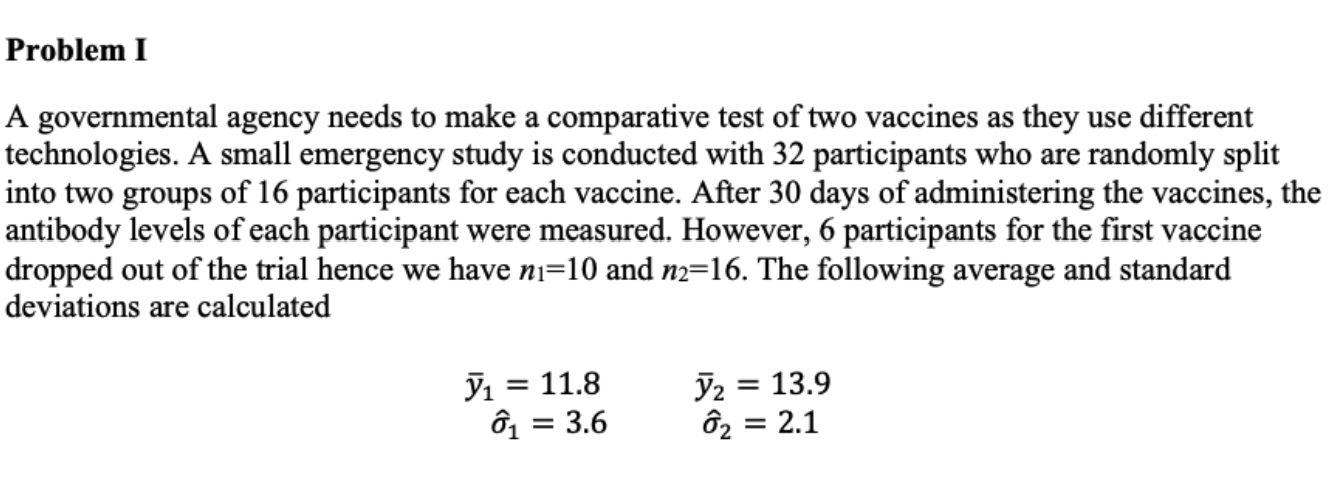
##  Q5

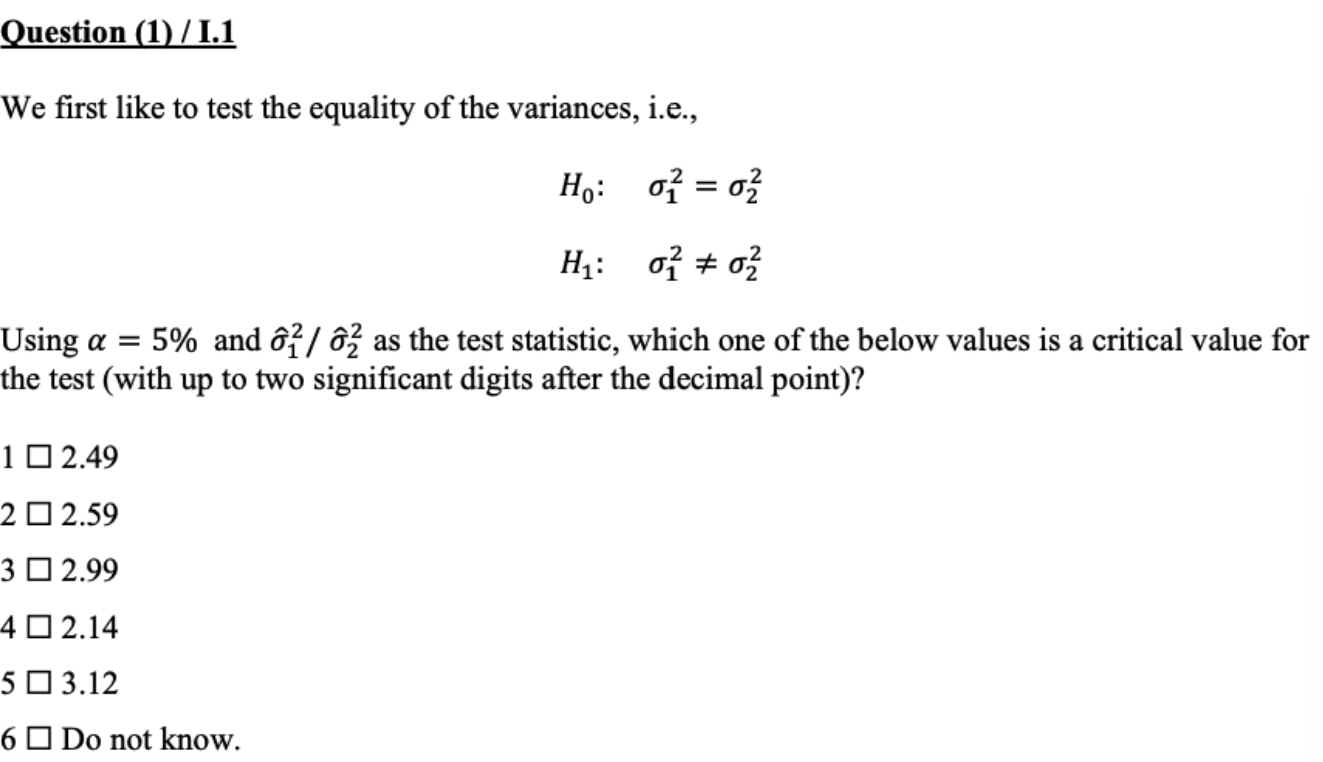

In [10]:
print(stats.f.ppf(0.975, 9, 15))

3.122711726303326


---
##  Q6  
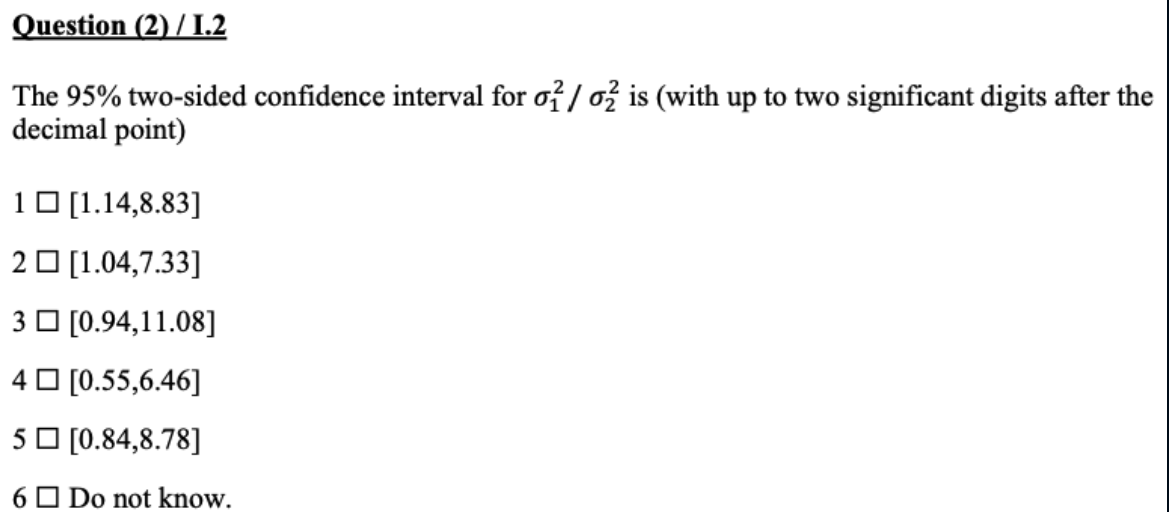

In [ ]:

s1_sq = 3.6**2
s2_sq = 2.1**2
n1 = 10
n2 = 16
alpha = 0.05

df1 = n1 - 1
df2 = n2 - 1

F_lower = stats.f.ppf(alpha/2, df1, df2)
F_upper = stats.f.ppf(1 - alpha/2, df1, df2)

ratio = s1_sq / s2_sq

ci_lower = ratio / F_upper
ci_upper = ratio / F_lower

print(ci_lower, ci_upper)

0.941097279473508 11.077294861606942


---
##  Q7
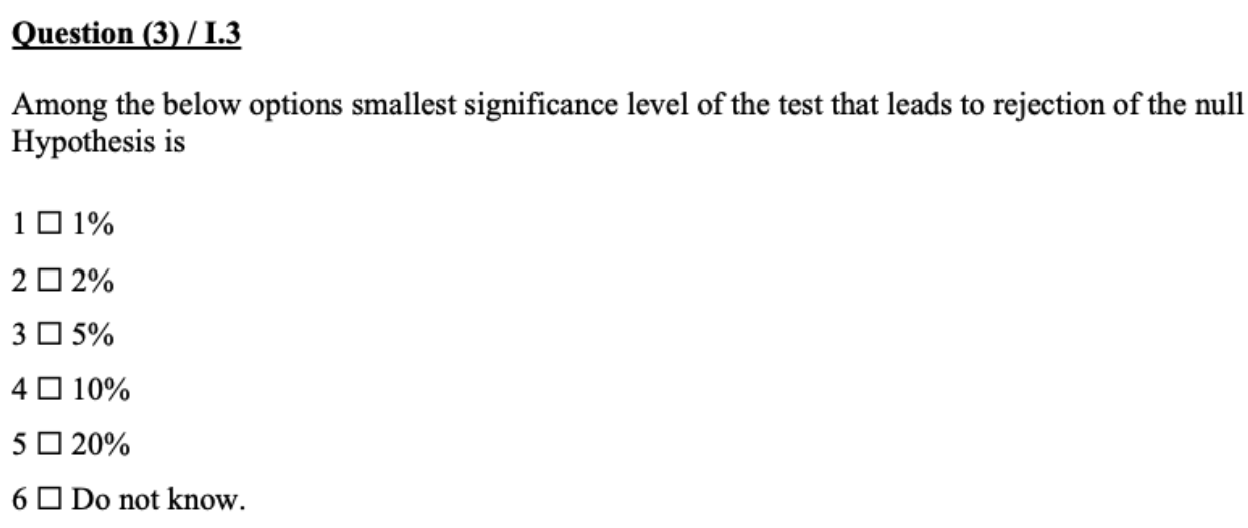